<a href="https://colab.research.google.com/github/mfquansah/projects/blob/main/CareerSkills.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler


file_path = "/content/drive/My Drive/Colab Notebooks/Datasets/career_skills_audit.csv"
df = pd.read_csv(file_path)
df

,Area,Interest_1,Ability_1,Interest_2,Ability_2,Interest_3,Ability_3,Interest_4,Ability_4
0,Product Management,3.00,3.67,3.33,3.00,3.00,3.33,3.67,3.67
1,Data Engineering,2.33,2.00,4.00,1.33,2.33,2.33,3.33,2.00
2,Data Analysis,4.33,4.00,4.33,3.33,4.33,2.67,5.00,4.00
3,Data Science,4.67,3.00,3.67,2.67,4.67,2.67,4.00,2.67
4,Product Analysis,4.00,3.00,4.00,4.00,3.00,2.00,3.67,4.00
5,Analytics Engineer,3.00,2.33,2.33,1.67,2.67,2.33,3.67,3.33
6,ML Engineer,3.33,2.33,3.00,2.00,3.00,1.00,3.67,1.33
7,Data Governance,2.33,3.00,2.00,2.33,2.00,3.00,2.67,3.00


In [4]:
# Identify interest and ability columns
interest_cols = ['Interest_1', 'Interest_2', 'Interest_3', 'Interest_4']
ability_cols = ['Ability_1', 'Ability_2', 'Ability_3', 'Ability_4']

# Compute average Interest and Ability per career
df['Avg_Interest'] = df[interest_cols].mean(axis=1)
df['Avg_Ability'] = df[ability_cols].mean(axis=1)

# Selecting only Interest & Ability for clustering
X = df[['Avg_Interest', 'Avg_Ability']]

# Normalize the data (important for clustering)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Apply K-Means Clustering
kmeans = KMeans(n_clusters=4, random_state=42, n_init=10)
df['Cluster'] = kmeans.fit_predict(X_scaled)

# Define cluster labels
cluster_labels = {
    0: "High Fit",
    1: "Growth Potential",
    2: "Mismatch",
    3: "Low Fit"
}
df['Cluster Label'] = df['Cluster'].map(cluster_labels)



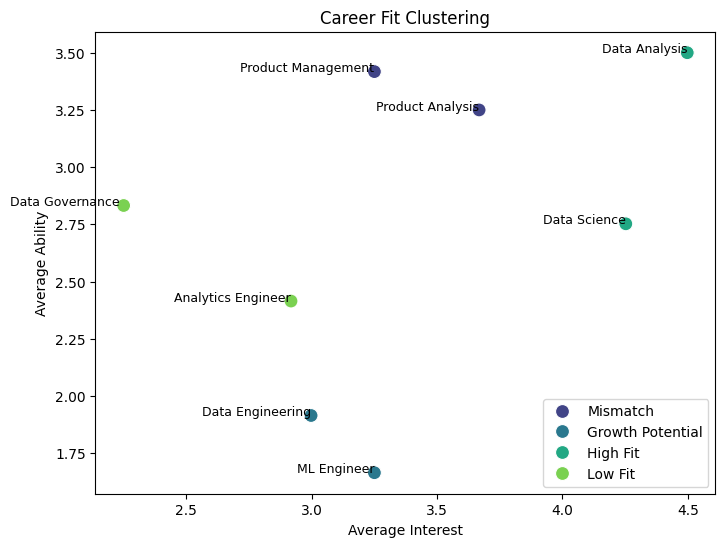

                 Area  Avg_Interest  Avg_Ability     Cluster Label
0  Product Management        3.2500       3.4175          Mismatch
1    Data Engineering        2.9975       1.9150  Growth Potential
2       Data Analysis        4.4975       3.5000          High Fit
3        Data Science        4.2525       2.7525          High Fit
4    Product Analysis        3.6675       3.2500          Mismatch
5  Analytics Engineer        2.9175       2.4150           Low Fit
6         ML Engineer        3.2500       1.6650  Growth Potential
7    Data Governance         2.2500       2.8325           Low Fit


In [5]:
# Plot the clusters with labels
plt.figure(figsize=(8,6))
sns.scatterplot(x=df['Avg_Interest'], y=df['Avg_Ability'], hue=df['Cluster Label'], palette='viridis', s=100)

# Annotate each point with the career area
for i, row in df.iterrows():
    plt.text(row['Avg_Interest'], row['Avg_Ability'], row['Area'], fontsize=9, ha='right')

plt.xlabel("Average Interest")
plt.ylabel("Average Ability")
plt.title("Career Fit Clustering")
plt.legend()
plt.show()

# Print cluster assignments with career areas
print(df[['Area', 'Avg_Interest', 'Avg_Ability', 'Cluster Label']])

